**PRIMARY SOURCE:** 
P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.
Fabio Pagnotta, Hossain Mohammad Amran. E-Mail:fabio.pagnotta@studenti.unicam.it, mohammadamra.hossain '@' studenti.unicam.it University Of Camerino

**SECONDARY SOURCE:** 
[Kaggle](https://www.kaggle.com/uciml/student-alcohol-consumption).

# Data Cleaning & Variable Selection 

In [73]:
from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
The code for this notebook is hidden for easier reading.
To toggle it on/off, please click <a href="javascript:code_toggle()">here</a>.''')

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns


#Read in the CSV datasets.
math = pd.read_csv('C:\\Users\\beri.e.ndifon\\Documents\\Everything Else\\Personal\\Thinkful\\CSV Datasets\\Unit 2\\Unit 2 Lesson 1\\student-mat.csv')

#Subsetted variables of interest. 
math = math[['age','sex','absences','studytime', 'G1','G2','G3']]

#Converted the grades from the 20-point scale into percentages.
math['G1']=math['G1'].map(lambda x: x*5)
math['G2']=math['G2'].map(lambda x: x*5)
math['G3']=math['G3'].map(lambda x: x*5)

#Renamed certain variables for clarity. 
math.rename(columns = {'G1':'first score','G2':'second score','G3':'final score','studytime':'weekly studying'}, inplace = True)

#Dropped any null observations.
math = math.dropna()

math.head()

,age,sex,absences,weekly studying,first score,second score,final score
0,18,F,6,2,25,30,30
1,17,F,4,2,25,25,30
2,15,F,10,2,35,40,50
3,15,F,2,3,75,70,75
4,16,F,4,2,30,50,50


# Univariate Exploration

-  **OUTCOME VARIABLE:** 
   -  Final Score
-  **CATEGORICAL PREDICTOR VARIABLES:**
   -  Sex 
   -  Weekly Studying 
-  **CONTINUOUS PREDICTOR VARIABLES:**
   -  Age
   -  Absences
   -  First Score
   -  Second Score
   
There are 33 variables in the original dataset - I'm focusing on these 7 for this challenge.

In [75]:
math.describe()

,age,absences,weekly studying,first score,second score,final score
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,5.708861,2.035443,54.544304,53.569620,52.075949
std,1.276043,8.003096,0.839240,16.595973,18.807523,22.907213
min,15.000000,0.000000,1.000000,15.000000,0.000000,0.000000
25%,16.000000,0.000000,1.000000,40.000000,45.000000,40.000000
50%,17.000000,4.000000,2.000000,55.000000,55.000000,55.000000
75%,18.000000,8.000000,2.000000,65.000000,65.000000,70.000000
max,22.000000,75.000000,4.000000,95.000000,95.000000,100.000000


There are 395 observations - none of which are null - descriptive statistics are summarized above. None of the continuous variables have known probability distributions. 


## 'Age'

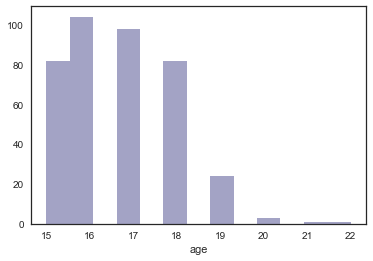

In [76]:
sns.set_style('white')
age = sns.distplot( math['age'], label='Age', color='midnightblue',kde=False)

**_'Age' is non-normal._**

## 'Absences'

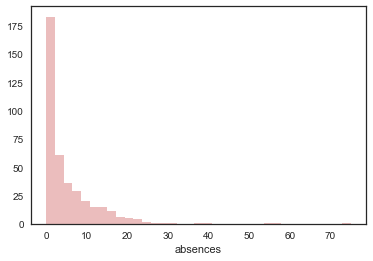

In [77]:
absences = sns.distplot(math['absences'],label='Absence',color='indianred',kde=False)

**_'Absences' is non-normal but somewhat resembles the log-normal distribution._**

## 'First Score'

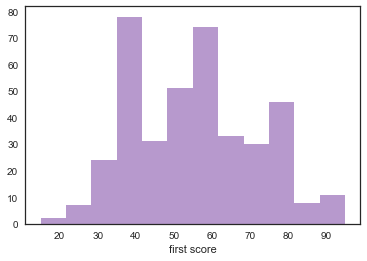

In [78]:
first_score = sns.distplot(math['first score'],label='First Score',color='indigo',kde=False)

**_'First Score' is non-normal._**

## 'Second Score'

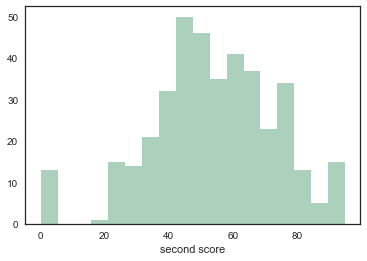

In [79]:
second_score = sns.distplot(math['second score'],label='Second Score',color='seagreen',kde=False)

**_'Second Score' is non-normal._**

## 'Final Score'

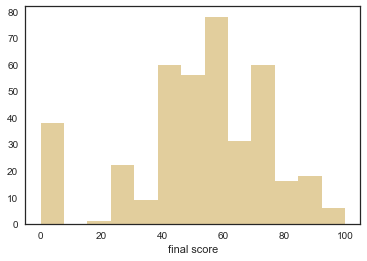

In [80]:
final_score = sns.distplot(math['final score'],label='Final Score',color='darkgoldenrod',kde=False)

**_'Final Score' is non-normal._**

## 'Sex'

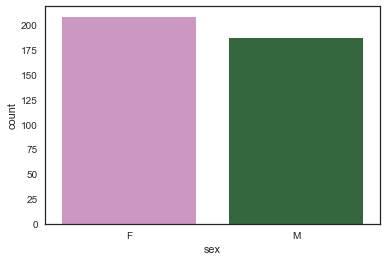

In [81]:
sex = sns.countplot(math['sex'],palette='cubehelix_r')

**_The sexes are almost equally represented (~210 are female and 185 are male)._**

## 'Weekly Studying'

### Created New Feature: 'Weekly Studying' (Recoded)

**_Below I created a feature that recodes 'Weekly Studying' as a string so that its interpretation is intuitive._**

In [82]:
features = pd.DataFrame()

math['weeklystudying_recoded'] = None

math.loc[math['weekly studying'] == 1, 'weeklystudying_recoded'] = '<2 Hours'
math.loc[math['weekly studying'] == 2, 'weeklystudying_recoded'] = '2 to 5 Hours'
math.loc[math['weekly studying'] == 3, 'weeklystudying_recoded'] = '5 to 10 Hours'
math.loc[math['weekly studying'] == 4, 'weeklystudying_recoded'] = '>10 Hours'

features['weeklystudying_recoded']=math['weeklystudying_recoded']

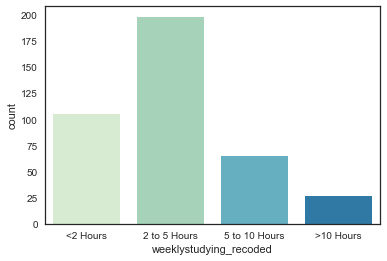

In [83]:
weekly_studying = sns.countplot(math['weeklystudying_recoded'],palette='GnBu', order=['<2 Hours','2 to 5 Hours','5 to 10 Hours','>10 Hours'])

**_Most students (~200 of 395) spend 2-5 hours weekly studying Math.<br> A very small fraction of students (~25 of 395) spend more than 10 hours weekly studying Math._**  

# Bivariate Exploration

## Categorical Variable Relationships

In [84]:
categorical = math[['sex','weeklystudying_recoded']]
counttable = pd.crosstab(categorical['sex'], categorical['weeklystudying_recoded'])
counttable.head()

weeklystudying_recoded,2 to 5 Hours,5 to 10 Hours,<2 Hours,>10 Hours
sex,,,,
F,113,51,27,17
M,85,14,78,10


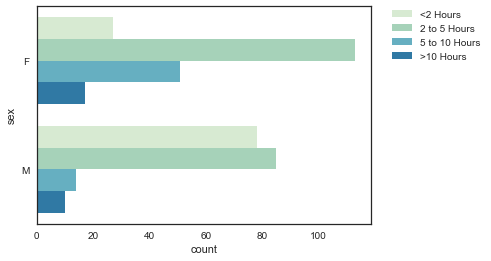

In [85]:
relationships = sns.countplot(y='sex', hue='weeklystudying_recoded', data=categorical, palette='GnBu',hue_order=['<2 Hours','2 to 5 Hours','5 to 10 Hours','>10 Hours'])
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**_Female students spend more time studying Math weekly than male students._**<br>
**_The majority of both female and male students spend 2 to 5 hours studying Math weekly._**<br>
**_Whereas '5 to 10 Hours' is the next largest category for female students, '<2 Hours' is the next largest category for male students._**<br> 
**_Both male and female students least often spend more than 10 hours studying Math weekly._**

In [86]:
print(stats.chisquare(counttable, axis=None))

Power_divergenceResult(statistic=212.45316455696201, pvalue=2.6341013008569436e-42)


**_Based on the Chi-Square statistic and its p-value, observed differences across the sexes in hours spent studying weekly are significant (alpha=0.05)._** 

## Continuous Variable Relationships

C:\Users\beri.e.ndifon\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
C:\Users\beri.e.ndifon\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


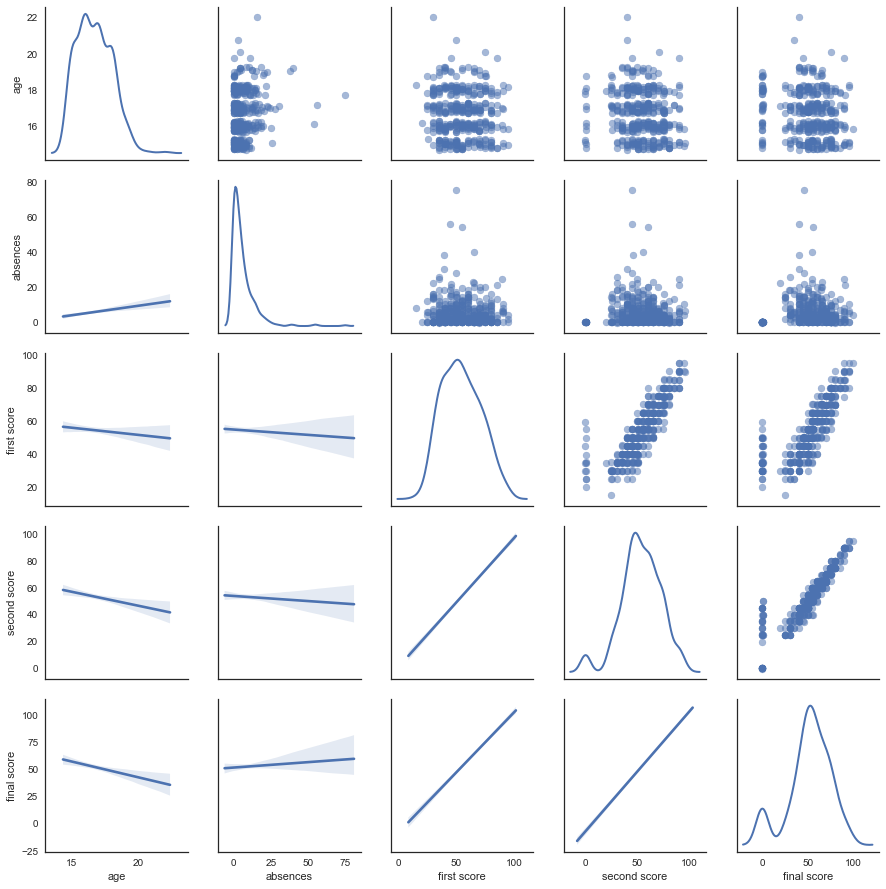

In [87]:
continuous = math[['age','absences','first score','second score','final score']]
jitter = pd.DataFrame(np.random.uniform(-.3, .3, size=(continuous.shape)),columns=continuous.columns)
continuous = continuous.add(jitter)
relationships = sns.PairGrid(continuous, diag_sharey=False)
relationships.map_upper(plt.scatter, alpha=.5)
relationships.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
relationships.map_diag(sns.kdeplot, lw=2)
plt.show()

**_The most meaningful positive relationships are between 'first score','second score', and 'final score'._**<br>
**_There's also a weakly positive relationship between age and absences._**<br>
**_There are weak negative relationships between 'age' and 'first score','second score', and 'final score'._**<br>
**_The relationship between 'absence' and 'first score','second score', and 'final score' is ambiguous._**<br>



## Continuous/Categorical Variable Relationships 

**_I've pointed out a key insight from each of the paired box plots that follow that isn't already provided in the preceding distribution and count plots._**

### 'Age', 'Sex', & 'Weekly Studying'

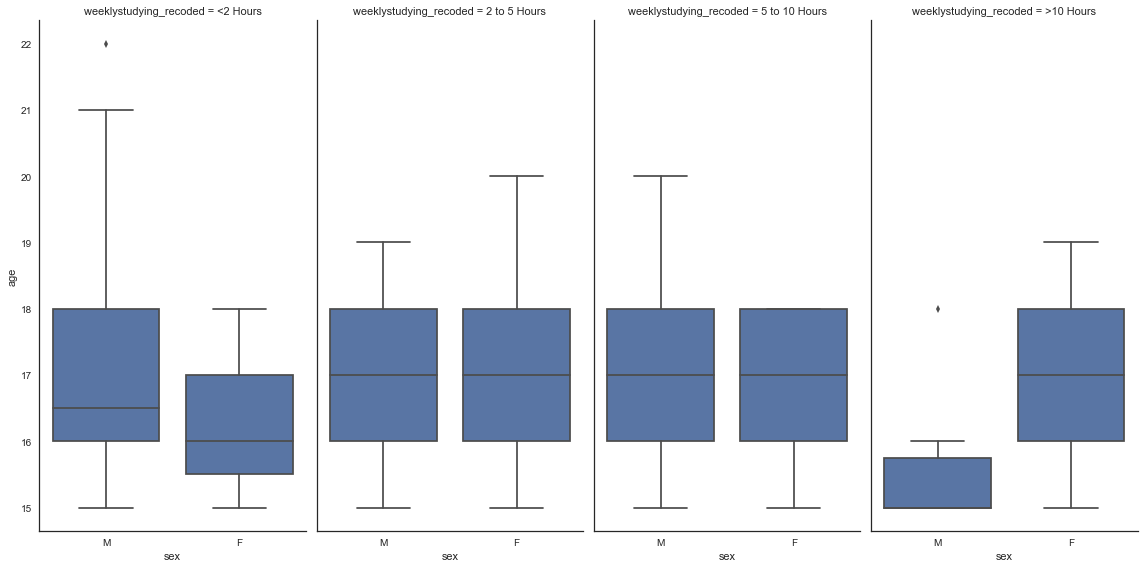

In [88]:
relationships = sns.FacetGrid(math, col='weeklystudying_recoded', col_order = ['<2 Hours','2 to 5 Hours','5 to 10 Hours','>10 Hours'],size=8, aspect=.5)
relationships = relationships.map(sns.boxplot, 'sex', 'age')

**_The middle 50% of both male and female students who spend anywhere from 2 to 10 hours studying Math weekly are about the same age._**

### 'Absences', 'Sex', & 'Weekly Studying'

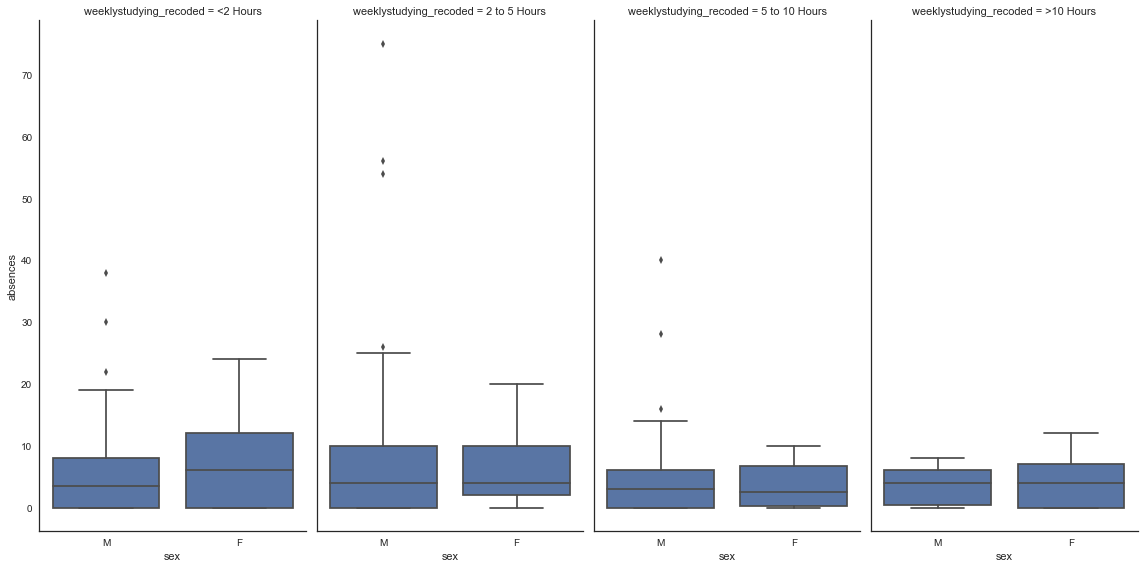

In [89]:
relationships = sns.FacetGrid(math, col='weeklystudying_recoded', col_order = ['<2 Hours','2 to 5 Hours','5 to 10 Hours','>10 Hours'],size=8, aspect=.5)
relationships = relationships.map(sns.boxplot, 'sex', 'absences')

**_There are several outliers that seem to suggest that truancy (in terms of number of absences) has a negative relationship to study habits (in terms of hours spent weekly studying Math). Students of both sexes who spend more than 10 hours studying Math weekly are also absent the least._**

### 'First Score', 'Sex', & 'Weekly Studying'

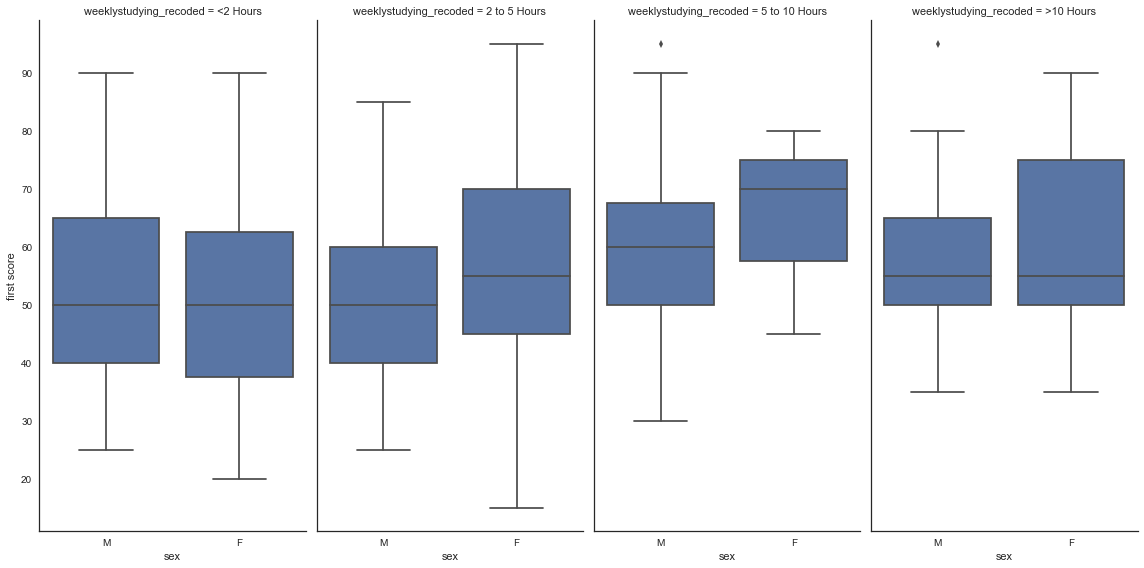

In [90]:
relationships = sns.FacetGrid(math, col='weeklystudying_recoded', col_order = ['<2 Hours','2 to 5 Hours','5 to 10 Hours','>10 Hours'],size=8, aspect=.5)
relationships = relationships.map(sns.boxplot, 'sex', 'first score')

**_The number of hours students of both sexes spend studying Math weekly doesn't dramatically improve how they score on the first assessment._**

### 'Second Score', 'Sex', & 'Weekly Studying'

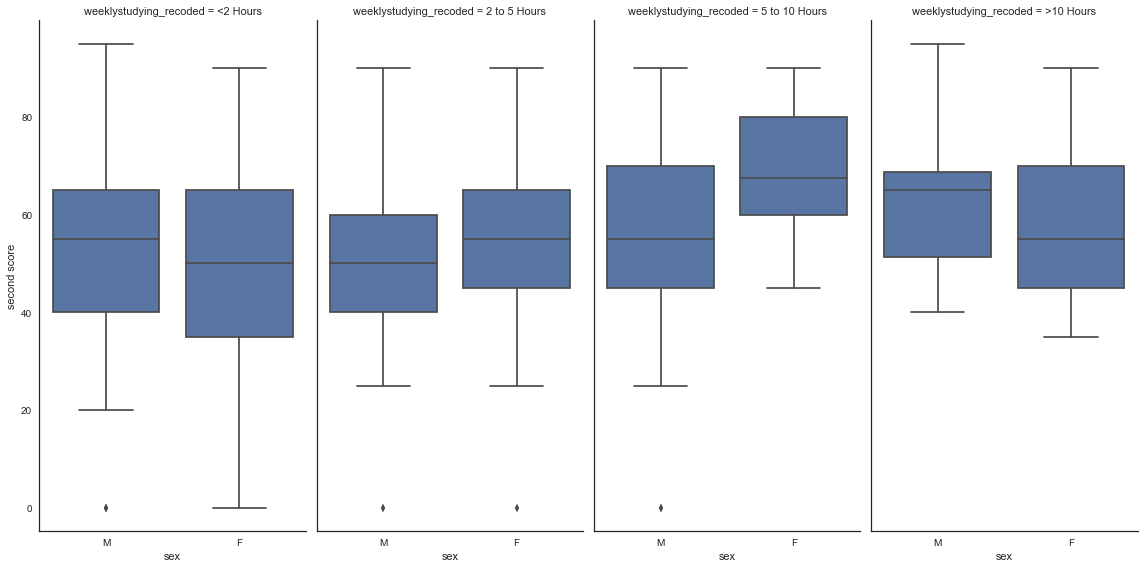

In [91]:
relationships = sns.FacetGrid(math, col='weeklystudying_recoded', col_order = ['<2 Hours','2 to 5 Hours','5 to 10 Hours','>10 Hours'], size=8, aspect=.5)
relationships = relationships.map(sns.boxplot, 'sex', 'second score')

**_Among students who spend anywhere from 2 to 10 hours studying Math weekly, females generally score better than males on the second assessment, based on the interquartile ranges. That improvement is more pronounced for females who spend 5 to 10 hours studying Math weekly. The distribution is more or less the same for students of both sexes who spend 2 to 5 hours studying Math weekly._**

### 'Final Score', 'Sex', & 'Weekly Studying'

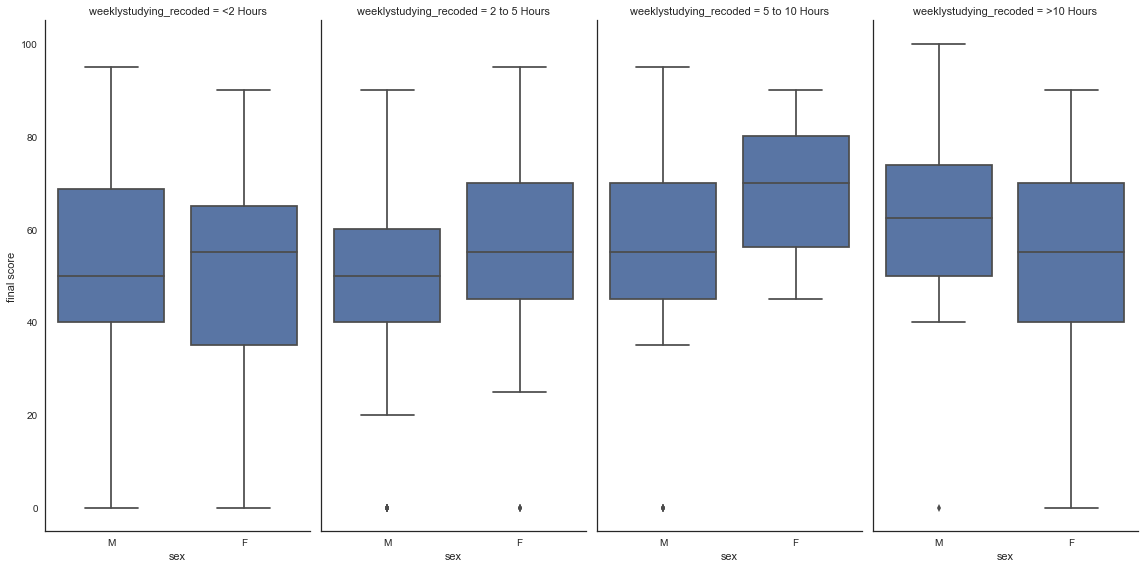

In [92]:
relationships = sns.FacetGrid(math, col='weeklystudying_recoded',col_order = ['<2 Hours','2 to 5 Hours','5 to 10 Hours','>10 Hours'], size=8, aspect=.5)
relationships = relationships.map(sns.boxplot, 'sex', 'final score')

**_The distribution of final scores for students of both sexes who spend less than 2 hours studying Math weekly is wide. Also, among students who spend more than 10 hours studying Math weekly, males have better final scores than females do._**

In [93]:
ttest = math[['age','absences','weekly studying','first score','second score','final score','sex']]
for col in ttest.loc[:,'age':'final score'].columns:
    print(col)
    print(stats.ttest_ind(a=(ttest[ttest['sex'] == 'M'][col]),b=(ttest[ttest['sex'] == 'F'][col])))

age
Ttest_indResult(statistic=-0.56731991936514736, pvalue=0.57082075760049811)
absences
Ttest_indResult(statistic=-1.3304512483459712, pvalue=0.18414111827754251)
weekly studying
Ttest_indResult(statistic=-6.3780114032614428, pvalue=5.0450443712895132e-10)
first score
Ttest_indResult(statistic=1.8283673434285308, pvalue=0.068252271688409694)
second score
Ttest_indResult(statistic=1.8135169726008136, pvalue=0.070514742296828373)
final score
Ttest_indResult(statistic=2.0619928155039706, pvalue=0.039865332341527705)


**_The sexes only seem to differ significantly in 'Weekly Studying' (per the Chi-Square statistic and its p-value) and 'Final Score' (alpha=0.05)._**

# Feature Engineering

 ### Created New Feature: 'Score'

**_Below I created a feature by combining the highly correlated 'first score' and 'second score' variables into one called 'score'._**

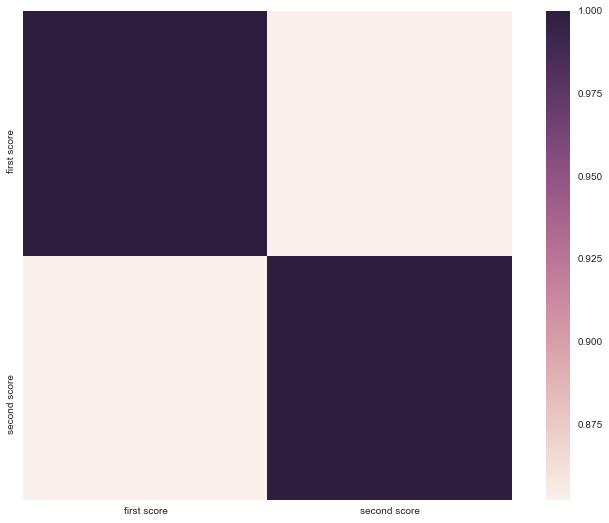

In [94]:
correlation = math[['first score','second score']]
correlation = correlation.corr()
f, ax = plt.subplots(figsize=(12, 9))
heatmap = sns.heatmap(correlation,square=True)

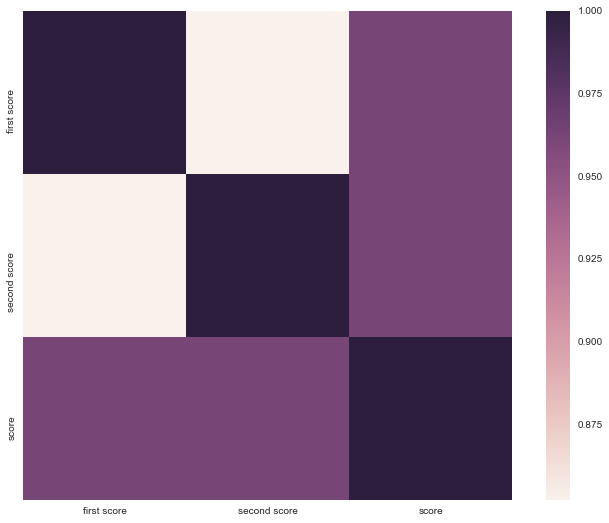

In [95]:
means = math[['first score','second score']].mean(axis=0) 
stds = math[['first score','second score']].std(axis=0)
features['score'] = ((math[['first score','second score']] - means) / stds).mean(axis=1)
correlation_update = math[['first score','second score']]
score = features['score']
correlation_frame = pd.concat([correlation_update,score],axis=1)
correlation_frame = correlation_frame.corr()
f, ax = plt.subplots(figsize=(12, 9))
heatmap = sns.heatmap(correlation_frame,square=True)

**_Below I created three more features by attempting to transform the variables on which they're based so that they're normally distributed._**<br>
**_These transformations aren't necessarily improvements - to fulfill challenge requirements. I chose one in each case to use as a feature anyway._**

 ### Created New Feature: 'Absences' (Transformed - Interim)

**_Because there are zero-values in 'absences', some of the transformations were throwing errors. I decided to add 1 to the series before re-attempting the transformations._**

In [96]:
features['absences_interim']=math['absences']+1

 ### Created New Feature: 'Absences' (Transformed)

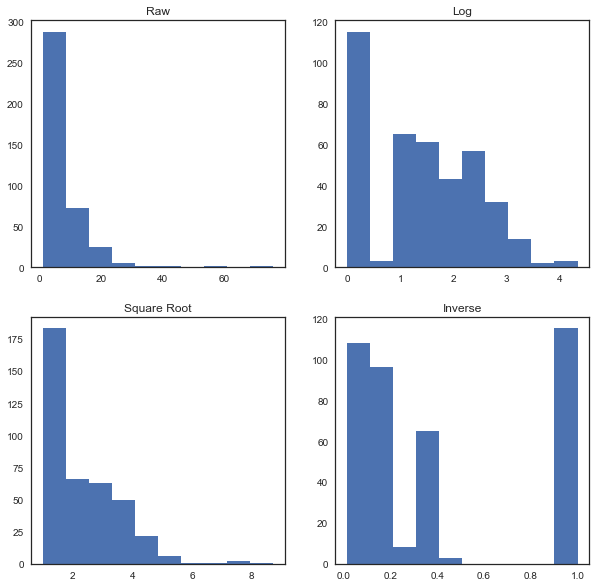

In [97]:

fig = plt.figure(figsize=[10,10])
fig.add_subplot(221)
plt.hist(features['absences_interim'])
plt.title('Raw')
fig.add_subplot(222)
plt.hist(np.log(features['absences_interim']))
plt.title('Log')
fig.add_subplot(223)
plt.hist(np.sqrt(features['absences_interim']))
plt.title('Square Root')
ax3=fig.add_subplot(224)
plt.hist(1/features['absences_interim'])
plt.title('Inverse')
plt.show()

features['absences_transformed'] = np.log(features['absences_interim'])

 ### Created New Feature: 'Age' (Transformed)

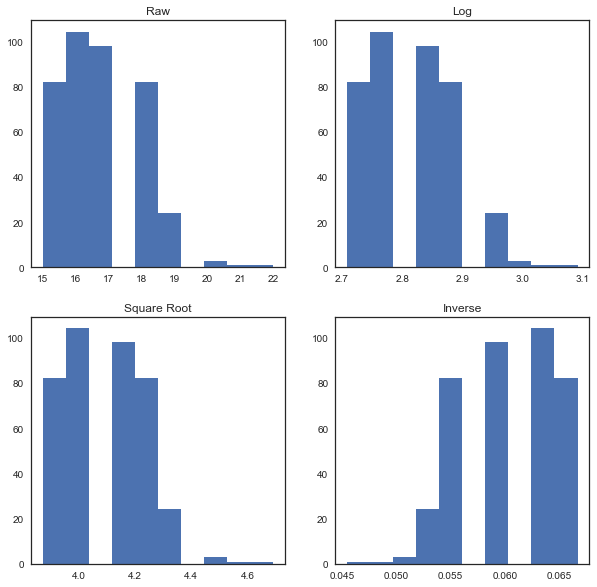

In [98]:
fig = plt.figure(figsize=[10,10])
fig.add_subplot(221)
plt.hist(math['age'])
plt.title('Raw')
fig.add_subplot(222)
plt.hist(np.log(math['age']))
plt.title('Log')
fig.add_subplot(223)
plt.hist(np.sqrt(math['age']))
plt.title('Square Root')
ax3=fig.add_subplot(224)
plt.hist(1/math['age'])
plt.title('Inverse')
plt.show()

features['age_transformed'] = np.sqrt(math['age'])

 ### Created New Feature: 'Score' (Transformed - Interim)

**_Because there are negative values in 'score', some of the transformations were throwing errors. I decided to square the entire series before re-attempting the transformations._**

In [99]:
features['score_interim']=features['score']**2

 ### Created New Feature: 'Score' (Transformed)

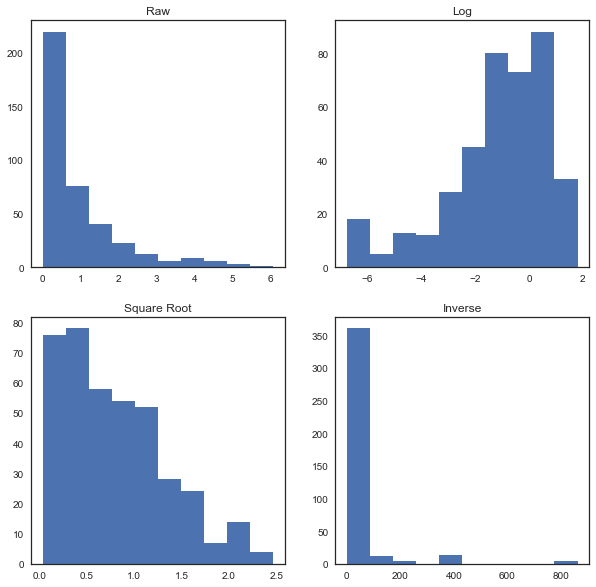

In [100]:

fig = plt.figure(figsize=[10,10])
fig.add_subplot(221)
plt.hist(features['score_interim'])
plt.title('Raw')
fig.add_subplot(222)
plt.hist(np.log(features['score_interim']))
plt.title('Log')
fig.add_subplot(223)
plt.hist(np.sqrt(features['score_interim']))
plt.title('Square Root')
ax3=fig.add_subplot(224)
plt.hist(1/features['score_interim'])
plt.title('Inverse')
plt.show()

features['score_transformed'] = np.sqrt(features['score_interim'])

### Created New Feature: 'Sex' (Recoded)

**_Below I created a feature that recodes 'Sex' with a dummy variable so that it could be considered in feature selection using the filtering method._**


In [101]:
features['sex_recoded'] = np.where((math['sex'].isin(['F', 'M'])), 1, 0)
math['sex_recoded'] = features['sex_recoded']

 ### Created New Feature: 'Weekly Studying' (Recoded)

**_Below I created a feature that recodes one level of 'Weekly Studying' ('<2 Hours') with a dummy variable so that it could be considered in feature selection using the filtering method._**

In [102]:
features['lessthan2hours_recoded'] = features['weeklystudying_recoded'].map({'<2 Hours': 1, '2 to 5 Hours': 0,'5 to 10 Hours': 0,'>10 Hours': 0})

 ### Created New Feature: 'Weekly Studying' (Recoded)

**_Below I created a feature that recodes one level of 'Weekly Studying' ('2 to 5 Hours') with a dummy variable so that it could be considered in feature selection using the filtering method._**

In [103]:
features['2to5hours_recoded'] = features['weeklystudying_recoded'].map({'<2 Hours': 0, '2 to 5 Hours': 1,'5 to 10 Hours': 0,'>10 Hours': 0})

 ### Created New Feature: 'Weekly Studying' (Recoded)

**_Below I created a feature that recodes one level of 'Weekly Studying' ('5 to 10 Hours') with a dummy variable so that it could be considered in feature selection using the filtering method._**

In [104]:
features['5to10hours_recoded'] = features['weeklystudying_recoded'].map({'<2 Hours': 0, '2 to 5 Hours': 0,'5 to 10 Hours': 1,'>10 Hours': 0})

### Summary: Features Created

-  'weeklystudying_recoded'
-  'score'
-  'absences_interim'
-  'absences_transformed'
-  'age_transformed'
-  'score_interim'
-  'score_transformed'
-  'sex_recoded'
-  'lessthan2hours_recoded'
-  '2to5hours_recoded'
-  '5to10hours_recoded'




In [105]:
features.head()

,weeklystudying_recoded,score,absences_interim,absences_transformed,age_transformed,score_interim,score_transformed,sex_recoded,lessthan2hours_recoded,2to5hours_recoded,5to10hours_recoded
0,2 to 5 Hours,-1.516705,7,1.945910,4.242641,2.300395,1.516705,1,0,1,0
1,2 to 5 Hours,-1.649631,5,1.609438,4.123106,2.721282,1.649631,1,0,1,0
2,2 to 5 Hours,-0.949576,11,2.397895,3.872983,0.901695,0.949576,1,0,1,0
3,5 to 10 Hours,1.053088,3,1.098612,3.872983,1.108995,1.053088,1,0,0,1
4,2 to 5 Hours,-0.834364,5,1.609438,4.000000,0.696164,0.834364,1,0,1,0


# Feature Selection: Filtering Method

**_I dropped 1 non-numeric and 2 interim features._**

In [106]:
features = features.drop(['weeklystudying_recoded','absences_interim','score_interim'],axis=1)
features['final score'] = math['final score']
features.head()

,score,absences_transformed,age_transformed,score_transformed,sex_recoded,lessthan2hours_recoded,2to5hours_recoded,5to10hours_recoded,final score
0,-1.516705,1.945910,4.242641,1.516705,1,0,1,0,30
1,-1.649631,1.609438,4.123106,1.649631,1,0,1,0,30
2,-0.949576,2.397895,3.872983,0.949576,1,0,1,0,50
3,1.053088,1.098612,3.872983,1.053088,1,0,0,1,75
4,-0.834364,1.609438,4.000000,0.834364,1,0,1,0,50


**_Below I rescaled all of the remaining variables in the features dataframe in preparation for feature selection using the filtering method._**

In [107]:
import sklearn
from sklearn import preprocessing

names=features.columns
scaled = pd.DataFrame(preprocessing.scale(features), columns=names)
scaled.head()

,score,absences_transformed,age_transformed,score_transformed,sex_recoded,lessthan2hours_recoded,2to5hours_recoded,5to10hours_recoded,final score
0,-1.578092,0.545167,1.029421,1.329839,0.0,-0.601722,0.997472,-0.443813,-0.964934
1,-1.716398,0.226416,0.257839,1.573525,0.0,-0.601722,0.997472,-0.443813,-0.964934
2,-0.988009,0.973347,-1.356666,0.290146,0.0,-0.601722,0.997472,-0.443813,-0.090739
3,1.095711,-0.257505,-1.356666,0.479910,0.0,-0.601722,-1.002535,2.253203,1.002004
4,-0.868134,0.226416,-0.536791,0.078933,0.0,-0.601722,0.997472,-0.443813,-0.090739


                           score  absences_transformed  age_transformed  \
score                   1.000000             -0.091168        -0.482528   
absences_transformed   -0.091168              1.000000         0.133666   
age_transformed        -0.482528              0.133666         1.000000   
score_transformed      -0.104966             -0.506236        -0.137371   
sex_recoded                  NaN                   NaN              NaN   
lessthan2hours_recoded -0.146779             -0.038917        -0.056965   
2to5hours_recoded      -0.101139              0.134822         0.032662   
5to10hours_recoded      0.196086             -0.182073         0.056504   
final score             0.979982              0.049546        -0.518170   

                        score_transformed  sex_recoded  \
score                           -0.104966          NaN   
absences_transformed            -0.506236          NaN   
age_transformed                 -0.137371          NaN   
score_transformed

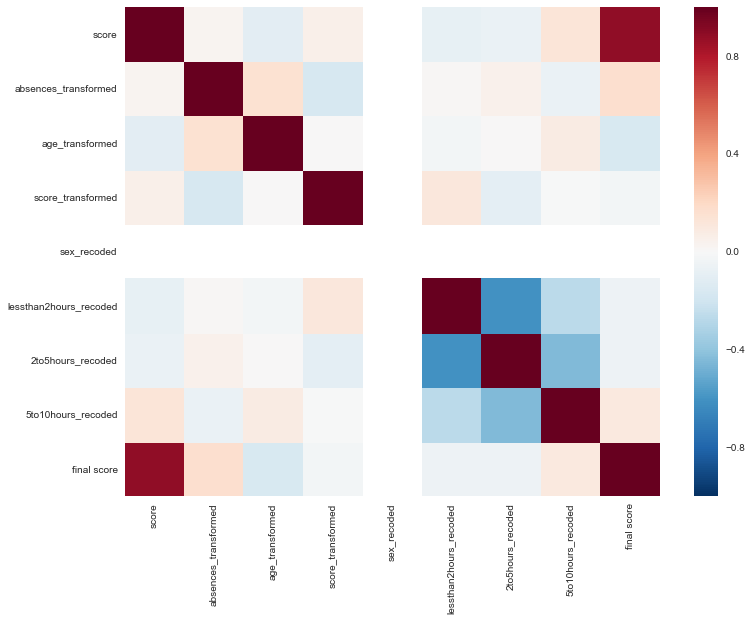

In [108]:
filtering = scaled.corr()
f, ax = plt.subplots(figsize=(12, 9))
print(filtering.corr())
heatmap = sns.heatmap(filtering)

**Based on these results, I'd keep 'score', 'absences_transformed', and '5 to 10 hours_recoded'.**<br>
**I'd like to make different variable selections from the set of 33 and re-run the analysis to see if I can create features that have more explanatory power.**